In [53]:
import pandas as pd
df = pd.read_csv('../z20_data/chipotle.tsv', sep='\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
# 기초 데이터 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [7]:
df.shape

(4622, 5)

In [8]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [12]:
df.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [15]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1.0,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1.0,1,Izze,[Clementine],$3.39
2,1.0,1,Nantucket Nectar,[Apple],$3.39
3,1.0,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2.0,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [82]:
df['item_price'] = df['item_price'].str.replace("$","").astype(float)

In [18]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1.0,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1.0,1,Izze,[Clementine],3.39
2,1.0,1,Nantucket Nectar,[Apple],3.39
3,1.0,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2.0,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [30]:
# 주문당 평균 계산금액 출력하시오.
# 18.811428571428568
df.groupby('order_id')['item_price'].sum().mean()


# 한 주문에 10달러 이상 사용한 주문 번호를 출력하시오.
#           quantity  item_price
# order_id                      
# 1                4       11.56
# 10               2       13.20
# 100              2       10.08
# 1000             2       20.50
df_sum = df.groupby('order_id').sum()
df_sum[df_sum['item_price']>=10].sort_values('item_price',ascending=False).head()['item_price']




order_id
926.0     205.25
1443.0    160.74
1483.0    139.00
691.0     118.25
1786.0    114.30
Name: item_price, dtype: float64

In [31]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [54]:
df['item_name']

0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object

In [59]:
df_sort =  df[df['item_name'] == '6 Pack Soft Drink']['quantity'].sort_values(ascending=False)
len(df_sort)

54

In [38]:
df.groupby('item_name')['quantity'].sum().head()

item_name
6 Pack Soft Drink        55
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    12
Barbacoa Salad Bowl      10
Name: quantity, dtype: int64

In [63]:
# item_name당 주문개수 출력하시오./ 주문개수의 합
df.groupby('item_name')['order_id'].count().head()
x = df.groupby('item_name')['order_id'].count().head().index
y = df.groupby('item_name')['order_id'].count().head().values

In [65]:
df.groupby('item_name')['order_id'].count().head()

item_name
6 Pack Soft Drink        54
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    11
Barbacoa Salad Bowl      10
Name: order_id, dtype: int64

<BarContainer object of 5 artists>

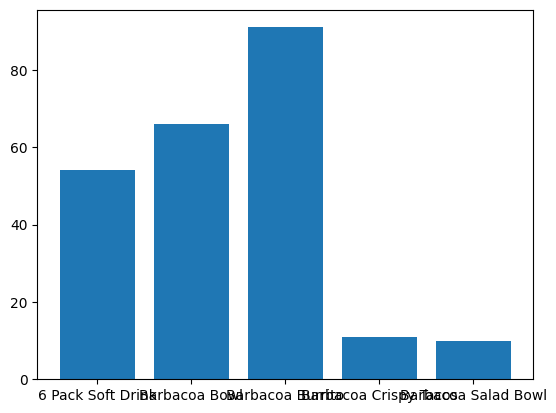

In [64]:
# 막대그래프를 그려보세요.
import matplotlib.pyplot as plt
# x = [1,2,3]
# y = [2,4,8]
# plt.plot(x,y)
plt.bar(x,y)

In [32]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1.0,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1.0,1,Izze,[Clementine],3.39
2,1.0,1,Nantucket Nectar,[Apple],3.39
3,1.0,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2.0,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [83]:
### 각 아이템의 가격 구하시오.
## 주문1개이면서,  item_name,  최저가격인 것을 출력하시오.
qu_df = df[df['quantity']==1]
groupby_df = qu_df.groupby('item_name').min()
# groupby_df.sort_values('item_price')
groupby_df.sort_values('item_price',ascending=False)

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [97]:
## 가장 비싼 주문에서 item이 총 몇개 주문되었는지 출력하시오.
## 주문중 가장 높은 금액의 수량과 금액을 출력하시오.
### ( 가장 높은 금액으로 주문한 주문번호,수량,금액을 출력하시오. )
# df.groupby('order_id')[['order_id','quantity','item_price']].sum().sort_values('item_price')
df_groupby = df.groupby('order_id').sum()
df_groupby[['item_name','item_price']]
# df_groupby.sort_values('item_price',ascending=False)

,item_name,item_price
order_id,,
1,Chips and Fresh Tomato SalsaIzzeNantucket Nect...,11.56
2,Chicken Bowl,16.98
3,Chicken BowlSide of Chips,12.67
4,Steak BurritoSteak Soft Tacos,21.00
5,Steak BurritoChips and Guacamole,13.70
...,...,...
1830,Steak BurritoVeggie Burrito,23.00
1831,Carnitas BowlChipsBottled Water,12.90
1832,Chicken Soft TacosChips and Guacamole,13.20


In [104]:
## Chicken Bowl를 2개 이상, 주문한 횟수가 몇번인지 출력하시오.
item_name_df = df[df['item_name']=='Chicken Bowl']  # 726개
len(item_name_df[item_name_df['quantity']>=2])

# Chicken Bowl 총 매출액을 출력하시오.
chicken_sum = item_name_df['item_price'].sum()
all_sum = df['item_price'].sum()
# Chicken Bowl은 총매출액의 몇%가 되는지 출력하시오.
chicken_sum/all_sum*100

21.283176657731442